In [173]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
clear_output()

In [175]:
dataset = pd.read_csv('insurance.csv')

map_sex = {k:v for v, k in enumerate(dataset['sex'].unique())}
map_smoker = {k:v for v, k in enumerate(dataset['smoker'].unique())}
map_region = {k:v for v, k in enumerate(dataset['region'].unique())}

dataset['sex'] = dataset['sex'].map(map_sex).astype('category')
dataset['smoker'] = dataset['smoker'].map(map_smoker).astype('category')
dataset['region'] = dataset['region'].map(map_region).astype('category')

for col in ['age', 'bmi', 'expenses', 'children']:
    dataset[col] = dataset[col].astype(np.float32)

dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0,27.900000,0.0,0,0,16884.919922
1,18.0,1,33.799999,1.0,1,1,1725.550049
2,28.0,1,33.000000,3.0,1,1,4449.459961
3,33.0,1,22.700001,0.0,1,2,21984.470703
4,32.0,1,28.900000,0.0,1,2,3866.860107


In [176]:
train_dataset = dataset.sample(frac=0.8)
train_labels = train_dataset.pop("expenses")

test_dataset = dataset.drop(index=train_dataset.index)
test_labels = test_dataset.pop("expenses")

In [191]:
layer = tf.keras.layers.experimental.preprocessing.Normalization()
layer.adapt(train_dataset)

model = tf.keras.Sequential([
    layer,
    tf.keras.layers.Dense(1, activation = 'relu')
])
model.compile(tf.keras.optimizers.experimental.SGD(learning_rate=100), loss='mean_absolute_error', metrics=['mae', 'mse'])

history = model.fit(train_dataset, train_labels, epochs = 200, validation_split=0.8)


Epoch 1/200
7/7 [==============================] - 0s 18ms/step - loss: 13175.2393 - mae: 13175.2393 - mse: 339405856.0000 - val_loss: 12540.7529 - val_mae: 12540.7529 - val_mse: 299685248.0000
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 12492.1445 - mae: 12492.1445 - mse: 322145376.0000 - val_loss: 11864.2832 - val_mae: 11864.2832 - val_mse: 283581664.0000
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 11850.2627 - mae: 11850.2627 - mse: 306157312.0000 - val_loss: 11263.7588 - val_mae: 11263.7588 - val_mse: 267958640.0000
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 11282.2490 - mae: 11282.2490 - mse: 290887040.0000 - val_loss: 10731.9805 - val_mae: 10731.9805 - val_mse: 252969248.0000
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 10771.3105 - mae: 10771.3105 - mse: 275749248.0000 - val_loss: 10219.8389 - val_mae: 10219.8389 - val_mse: 239054832.0000
Epoch 6/200
7/7 [=================

9/9 - 0s - loss: 3361.3108 - mae: 3361.3108 - mse: 48602024.0000 - 26ms/epoch - 3ms/step
Testing set Mean Abs Error: 3361.31 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 614us/step


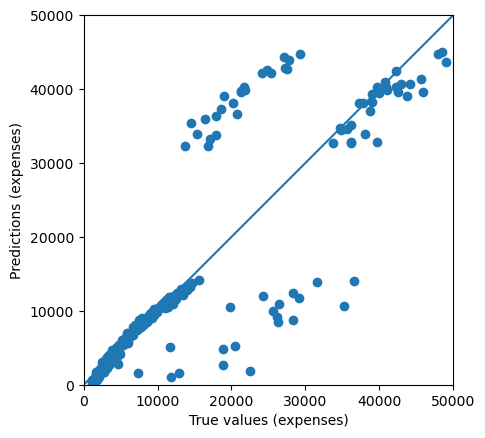

In [192]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)